In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fire-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F529007%2F969357%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240625%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240625T143412Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D46697e70cdfaa83a6662d80f88f428c9147b139ee353042f2cdff34321f1c5bfabf5275a6270b5a7e9835683f785911dd900c4367b1cabd2f97dfdce4db8f64899694178325bebb512bdfe541f87d822fb768d564b876b86d58532855112c7537428e7dd236e7e588568645ba69a8e9a995c7efdf794fafc8accba012db80e8b537480b9f0e2ffc2dba02bd0ac5d24f8b6b19c1182d89d53ab7f9898aa3e8fe62d6e7c6d31ebe5ce5c54cfd39cdd4085b675f41815bbebb84626eb7afc02a67214e049945ef7b12c913b08aa14fc4fb5adb435b1b105950c624cbf5cbe559664e017e6d653b083815e5c76049d50625f6dbaf6053b84b7c05cdd2517fd417e5b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 406135295 bytes downloaded
Downloaded and uncompressed: fire-dataset
Data source import complete.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [ ]:
import pathlib
fire_image_path_array = ["/kaggle/input/fire-dataset/fire_dataset/fire_images"]
non_fire_path_array = ["/kaggle/input/fire-dataset/fire_dataset/non_fire_images"]
fire_image_path = pathlib.Path(fire_image_path_array[0])
non_fire_path = pathlib.Path(non_fire_path_array[0])
for path in fire_image_path_array[1:]:
    fire_image_path.joinpath(path)

for path in non_fire_path_array[1:]:
    non_fire_path.joinpath(path)

In [ ]:
import glob
from itertools import chain

train_data_images = {
    "Fire":list(chain(fire_image_path.glob('*.jpg'), fire_image_path.glob('*.png'))),
    "NonFire":list(chain(non_fire_path.glob('*.jpg'), non_fire_path.glob('*.png')))
}
train_labels = {
    "Fire":0,"NonFire":1
}

In [ ]:
import glob
from itertools import chain

train_data_images = {
    "Fire":list(chain(fire_image_path.glob('*.jpg'), fire_image_path.glob('*.png'))),
    "NonFire":list(chain(non_fire_path.glob('*.jpg'), non_fire_path.glob('*.png')))
}
train_labels = {
    "Fire":0,"NonFire":1
}

In [ ]:
import PIL
import cv2
import matplotlib.pyplot as plt
import seaborn
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [ ]:
X, y = [], []
for label, images in train_data_images.items():
    for image in images:
        img = cv2.imread(str(image)) # Reading the image
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (180, 180))
            X.append(img)
            y.append(train_labels[label])

In [ ]:
import numpy
X_samp = numpy.array(X)
y_samp = numpy.array(y)

In [ ]:
X_samp = (X_samp/255)

In [ ]:
X_samp.shape

(998, 180, 180, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp, test_size=0.2)

In [ ]:
data_argumentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomContrast(0.2),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

In [ ]:
## BEGIN_SOLUTION
from tensorflow.keras.applications import MobileNetV2, ResNet50, Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

base_model_densenet = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
x = base_model_densenet.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(128, activation='relu')(x)
predictions_densenet = keras.layers.Dense(1, activation='sigmoid')(x)
model_densenet = keras.Model(inputs=base_model_densenet.input, outputs=predictions_densenet)

# ResNet50 Model
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions_resnet = Dense(1, activation='sigmoid')(x)
model_resnet = Model(inputs=base_model_resnet.input, outputs=predictions_resnet)

# Xception Model
base_model_xception = Xception(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
x = base_model_xception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions_xception = Dense(1, activation='sigmoid')(x)
model_xception = Model(inputs=base_model_xception.input, outputs=predictions_xception)

# Compile the models
model_densenet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_resnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_xception.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the models
history_densenet=model_densenet.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
history_resnet=model_resnet.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
history_xception=model_xception.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Predictions
y_pred_mobilenet = model_densenet.predict(X_test)
y_pred_resnet = model_resnet.predict(X_test)
y_pred_xception = model_xception.predict(X_test)

# Ensemble Model (Majority Voting)
ensemble_predictions = (y_pred_mobilenet + y_pred_resnet + y_pred_xception) / 3
ensemble_predictions = (ensemble_predictions > 0.5).astype(int)

# Evaluate Individual Models
print("\nDenseNet:")
print("Accuracy:", accuracy_score(y_test, (y_pred_mobilenet > 0.5).astype(int)))
print("F1 Score:", f1_score(y_test, (y_pred_mobilenet > 0.5).astype(int)))
print("Recall:", recall_score(y_test, (y_pred_mobilenet > 0.5).astype(int)))

print("\nResNet50:")
print("Accuracy:", accuracy_score(y_test, (y_pred_resnet > 0.5).astype(int)))
print("F1 Score:", f1_score(y_test, (y_pred_resnet > 0.5).astype(int)))
print("Recall:", recall_score(y_test, (y_pred_resnet > 0.5).astype(int)))

print("\nXception:")
print("Accuracy:", accuracy_score(y_test, (y_pred_xception > 0.5).astype(int)))
print("F1 Score:", f1_score(y_test, (y_pred_xception > 0.5).astype(int)))

 # Xception:")
print("Accuracy:", accuracy_score(y_test, (y_pred_xception > 0.5).astype(int)))
print("F1 Score:", f1_score(y_test, (y_pred_xception > 0.5).astype(int)))
print("Recall:", recall_score(y_test, (y_pred_xception > 0.5).astype(int)))

# Evaluate Ensemble Model
print("\nEnsemble Model (Majority Voting):")
print("Accuracy:", accuracy_score(y_test, ensemble_predictions))
print("F1 Score:", f1_score(y_test, ensemble_predictions))
print("Recall:", recall_score(y_test, ensemble_predictions))
## END_SOLUTION

83683744/83683744 [==============================] - 0s 0us/step
Epoch 1/100
25/25 [==============================] - 82s 594ms/step - loss: 0.1856 - accuracy: 0.9436 - val_loss: 66.8612 - val_accuracy: 0.7250
Epoch 2/100
25/25 [==============================] - 3s 138ms/step - loss: 0.1519 - accuracy: 0.9449 - val_loss: 8.7680 - val_accuracy: 0.7550
Epoch 3/100
25/25 [==============================] - 3s 138ms/step - loss: 0.1025 - accuracy: 0.9586 - val_loss: 0.6390 - val_accuracy: 0.9250
Epoch 4/100
25/25 [==============================] - 3s 136ms/step - loss: 0.0585 - accuracy: 0.9787 - val_loss: 0.6003 - val_accuracy: 0.9200
Epoch 5/100
25/25 [==============================] - 3s 137ms/step - loss: 0.0651 - accuracy: 0.9812 - val_loss: 0.5588 - val_accuracy: 0.9200
Epoch 6/100
25/25 [==============================] - 3s 138ms/step - loss: 0.0348 - accuracy: 0.9862 - val_loss: 0.1799 - val_accuracy: 0.9600
Epoch 7/100
25/25 [==============================] - 3s 138ms/step - loss: 

In [ ]:
from sklearn.metrics import classification_report

# Assuming y_pred_* variables hold the predicted probabilities
y_pred_mobilenet_binary = (y_pred_mobilenet > 0.5).astype(int)
y_pred_resnet_binary = (y_pred_resnet > 0.5).astype(int)
y_pred_xception_binary = (y_pred_xception > 0.5).astype(int)

print("\nDenseNet Classification Report:")
print(classification_report(y_test, y_pred_mobilenet_binary))

print("\nResNet50 Classification Report:")
print(classification_report(y_test, y_pred_resnet_binary))

print("\nXception Classification Report:")
print(classification_report(y_test, y_pred_xception_binary))
from sklearn.metrics import classification_report

# Assuming ensemble_predictions holds the predicted labels from the ensemble model
print("\nEnsemble Model Classification Report:")
print(classification_report(y_test, ensemble_predictions))


DenseNet Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       145
           1       0.92      0.98      0.95        55

    accuracy                           0.97       200
   macro avg       0.95      0.97      0.96       200
weighted avg       0.97      0.97      0.97       200


ResNet50 Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       145
           1       1.00      0.91      0.95        55

    accuracy                           0.97       200
   macro avg       0.98      0.95      0.97       200
weighted avg       0.98      0.97      0.97       200


Xception Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       145
           1       0.98      0.93      0.95        55

    accuracy                           0.97       200
   macro avg       0.98      

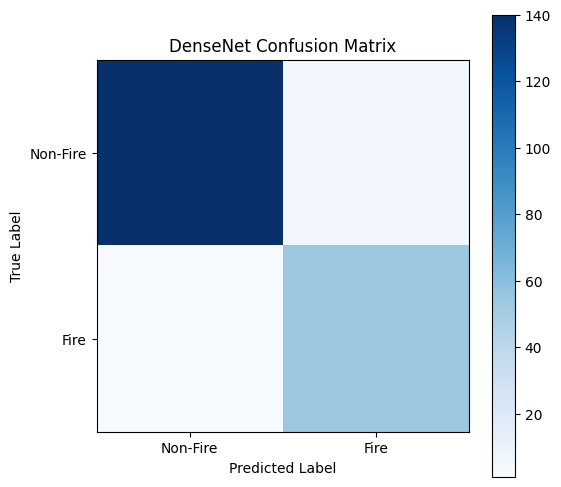

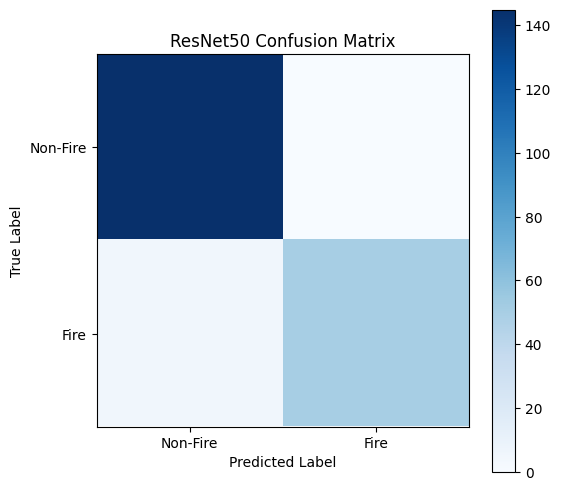

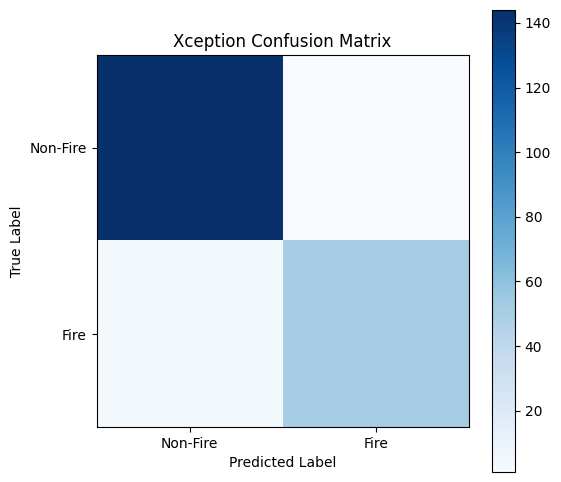

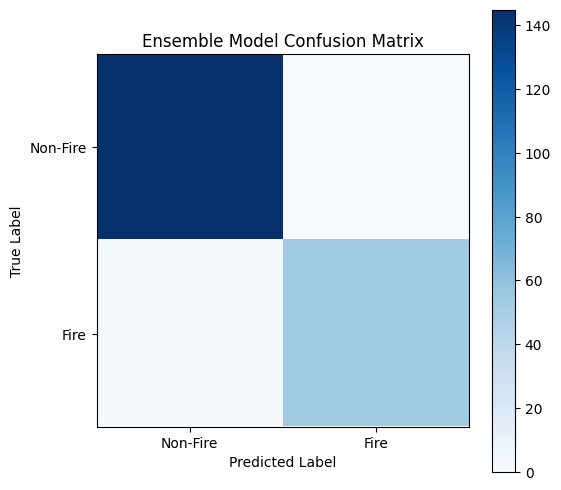

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_pred_* variables hold the predicted probabilities
y_pred_densenet_binary = (y_pred_mobilenet > 0.5).astype(int)
y_pred_resnet_binary = (y_pred_resnet > 0.5).astype(int)
y_pred_xception_binary = (y_pred_xception > 0.5).astype(int)

# DenseNet Confusion Matrix
cm_densenet = confusion_matrix(y_test, y_pred_mobilenet_binary)
plt.figure(figsize=(6, 6))
plt.imshow(cm_densenet, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("DenseNet Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['Non-Fire', 'Fire'])
plt.yticks([0, 1], ['Non-Fire', 'Fire'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ResNet50 Confusion Matrix
cm_resnet = confusion_matrix(y_test, y_pred_resnet_binary)
plt.figure(figsize=(6, 6))
plt.imshow(cm_resnet, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("ResNet50 Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['Non-Fire', 'Fire'])
plt.yticks([0, 1], ['Non-Fire', 'Fire'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Xception Confusion Matrix
cm_xception = confusion_matrix(y_test, y_pred_xception_binary)
plt.figure(figsize=(6, 6))
plt.imshow(cm_xception, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Xception Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['Non-Fire', 'Fire'])
plt.yticks([0, 1], ['Non-Fire', 'Fire'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Ensemble Model Confusion Matrix
cm_ensemble = confusion_matrix(y_test, ensemble_predictions)
plt.figure(figsize=(6, 6))
plt.imshow(cm_ensemble, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Ensemble Model Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['Non-Fire', 'Fire'])
plt.yticks([0, 1], ['Non-Fire', 'Fire'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

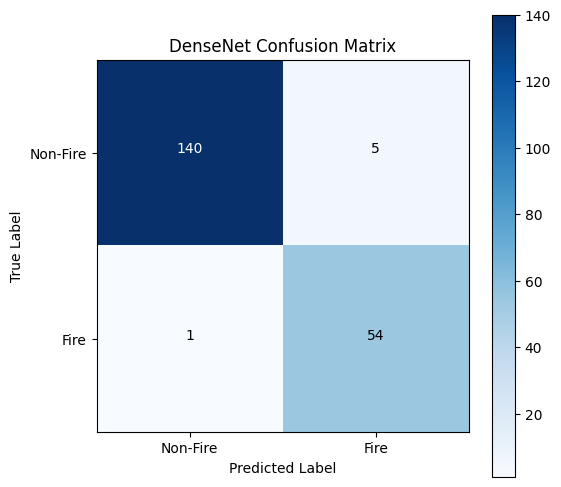

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ... (previous code to calculate confusion matrices)

# DenseNet Confusion Matrix
cm_densenet = confusion_matrix(y_test, y_pred_mobilenet_binary)
plt.figure(figsize=(6, 6))
plt.imshow(cm_densenet, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("DenseNet Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['Non-Fire', 'Fire'])
plt.yticks([0, 1], ['Non-Fire', 'Fire'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add text annotations
thresh = cm_densenet.max() / 2.
for i in range(cm_densenet.shape[0]):
    for j in range(cm_densenet.shape[1]):
        plt.text(j, i, format(cm_densenet[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_densenet[i, j] > thresh else "black")

plt.show()

# Repeat the same process for ResNet50, Xception, and Ensemble Model confusion matrices
# ...

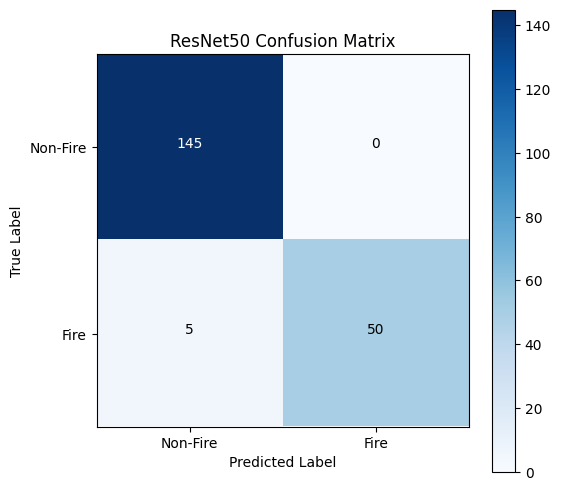

In [ ]:
# ResNet50 Confusion Matrix
cm_resnet = confusion_matrix(y_test, y_pred_resnet_binary)
plt.figure(figsize=(6, 6))
plt.imshow(cm_resnet, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("ResNet50 Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['Non-Fire', 'Fire'])
plt.yticks([0, 1], ['Non-Fire', 'Fire'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add text annotations
thresh = cm_resnet.max() / 2.
for i in range(cm_resnet.shape[0]):
    for j in range(cm_resnet.shape[1]):
        plt.text(j, i, format(cm_resnet[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_resnet[i, j] > thresh else "black")

plt.show()

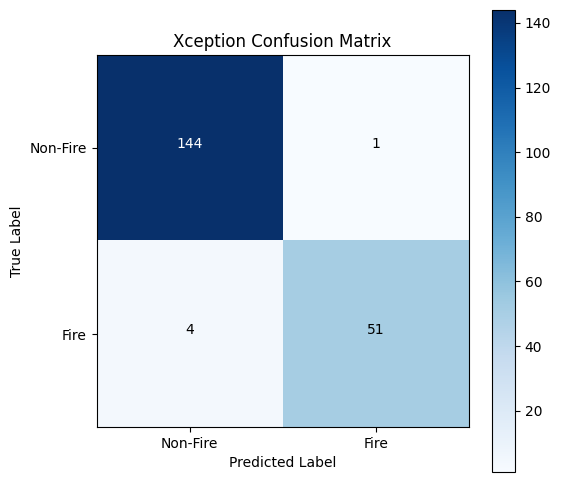

In [ ]:
# Xception Confusion Matrix
cm_xception = confusion_matrix(y_test, y_pred_xception_binary)
plt.figure(figsize=(6, 6))
plt.imshow(cm_xception, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Xception Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['Non-Fire', 'Fire'])
plt.yticks([0, 1], ['Non-Fire', 'Fire'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add text annotations
thresh = cm_xception.max() / 2.
for i in range(cm_xception.shape[0]):
    for j in range(cm_xception.shape[1]):
        plt.text(j, i, format(cm_xception[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_xception[i, j] > thresh else "black")

plt.show()

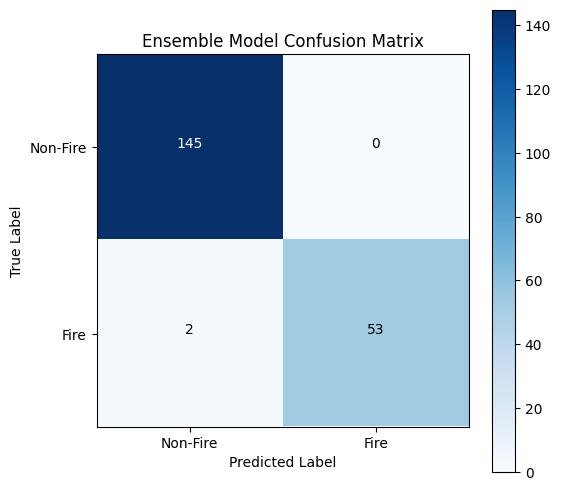

In [ ]:
# Ensemble Model Confusion Matrix
cm_ensemble = confusion_matrix(y_test, ensemble_predictions)
plt.figure(figsize=(6, 6))
plt.imshow(cm_ensemble, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Ensemble Model Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['Non-Fire', 'Fire'])
plt.yticks([0, 1], ['Non-Fire', 'Fire'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add text annotations
thresh = cm_ensemble.max() / 2.
for i in range(cm_ensemble.shape[0]):
    for j in range(cm_ensemble.shape[1]):
        plt.text(j, i, format(cm_ensemble[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_ensemble[i, j] > thresh else "black")

plt.show()

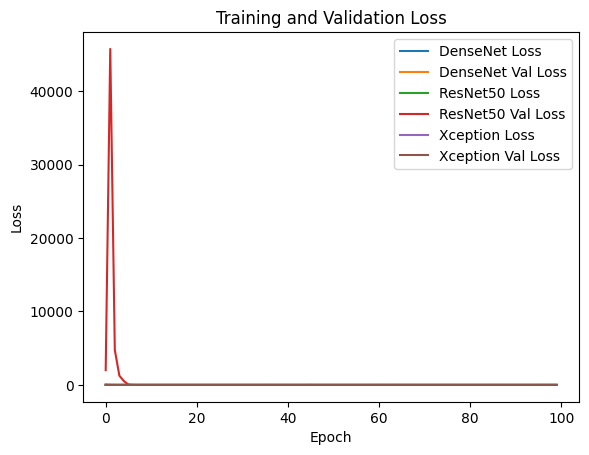

--2024-06-25 17:10:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.4’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-06-25 17:10:47 (14.0 MB/s) - ‘helper_functions.py.4’ saved [10246/10246]



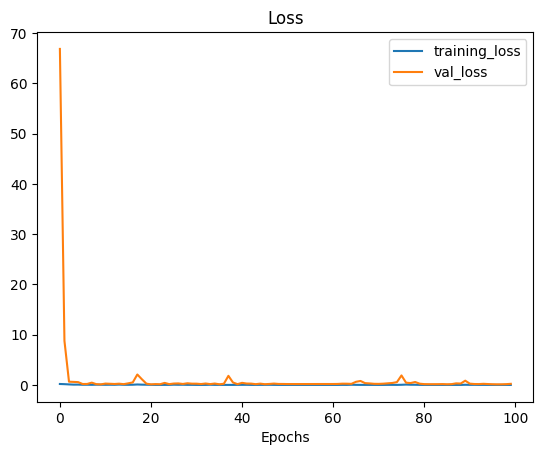

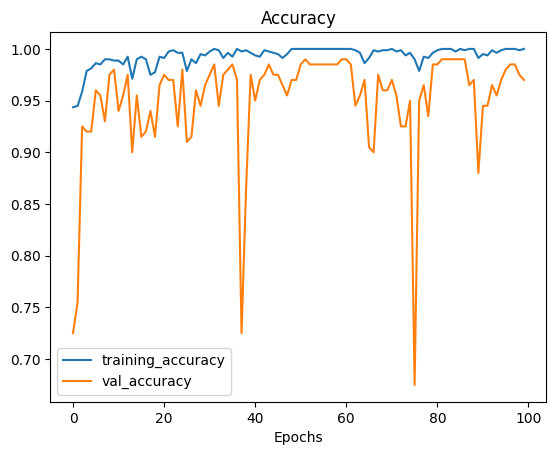

In [ ]:
plt.plot(history_densenet.history['loss'], label='DenseNet Loss')
plt.plot(history_densenet.history['val_loss'], label='DenseNet Val Loss')
plt.plot(history_resnet.history['loss'], label='ResNet50 Loss')
plt.plot(history_resnet.history['val_loss'], label='ResNet50 Val Loss')
plt.plot(history_xception.history['loss'], label='Xception Loss')
plt.plot(history_xception.history['val_loss'], label='Xception Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for our notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot

plot_loss_curves(history_densenet)


In [ ]:
plot_loss_curves(history_resnet)

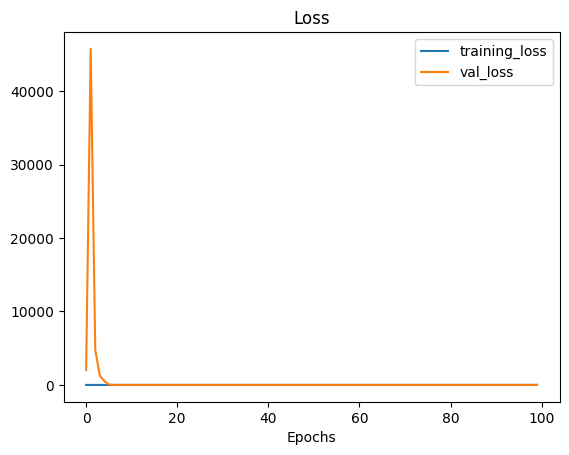

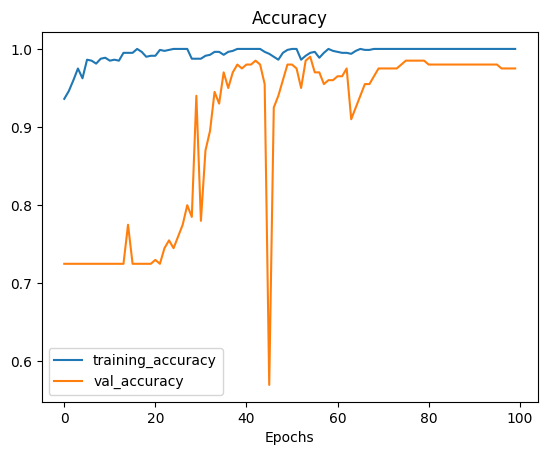

In [ ]:
plot_loss_curves(history_resnet)


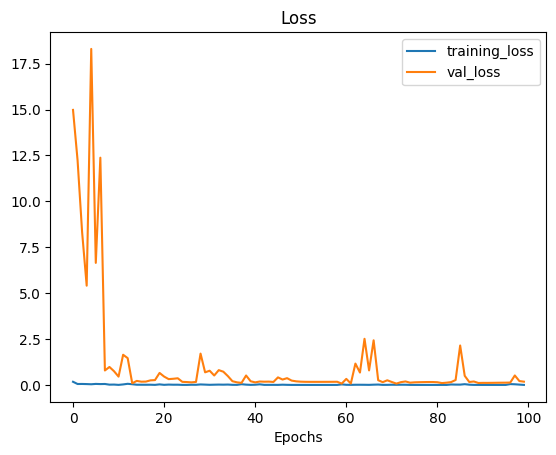

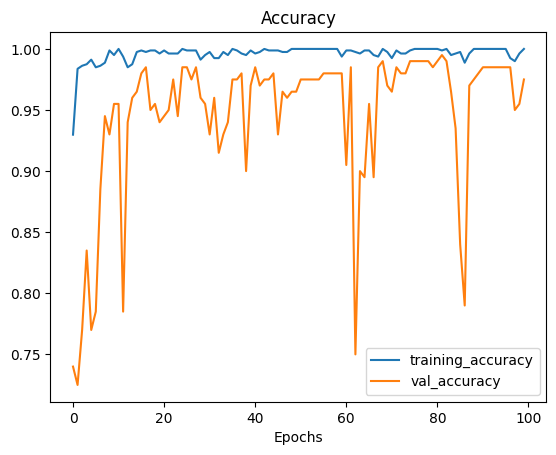

In [ ]:

plot_loss_curves(history_xception)
